# CIA Country Analysis and Clustering


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----

## Imports and Data

**TASK: Run the following cells to import libraries and read in data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/mete/udemy/DATA/CIA_Country_Facts.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


# Exploratory Data Analysis

**TASK: Create a histogram of the Population column.**

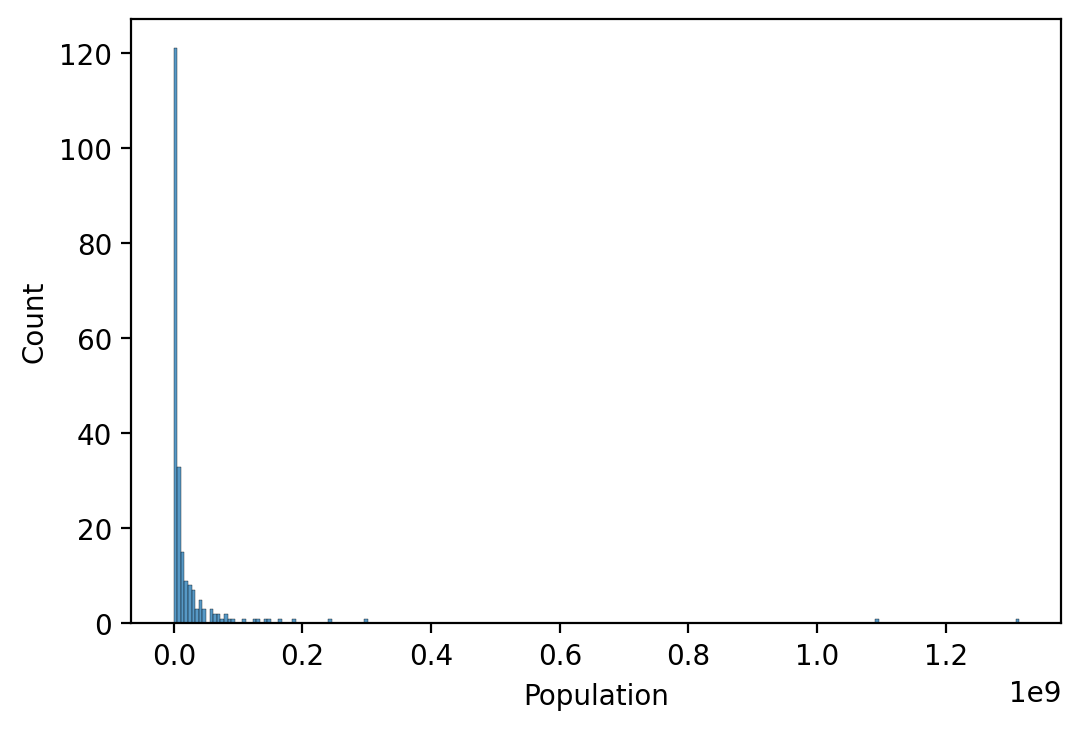

In [6]:
plt.figure(dpi=200)
sns.histplot(df["Population"]);

**TASK: You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

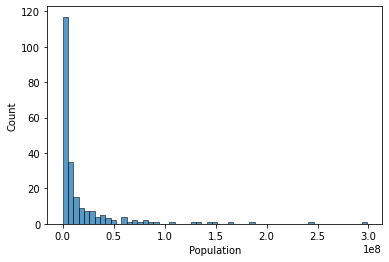

In [7]:
sns.histplot(df["Population"][df["Population"]<500000000]);

**TASK: Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

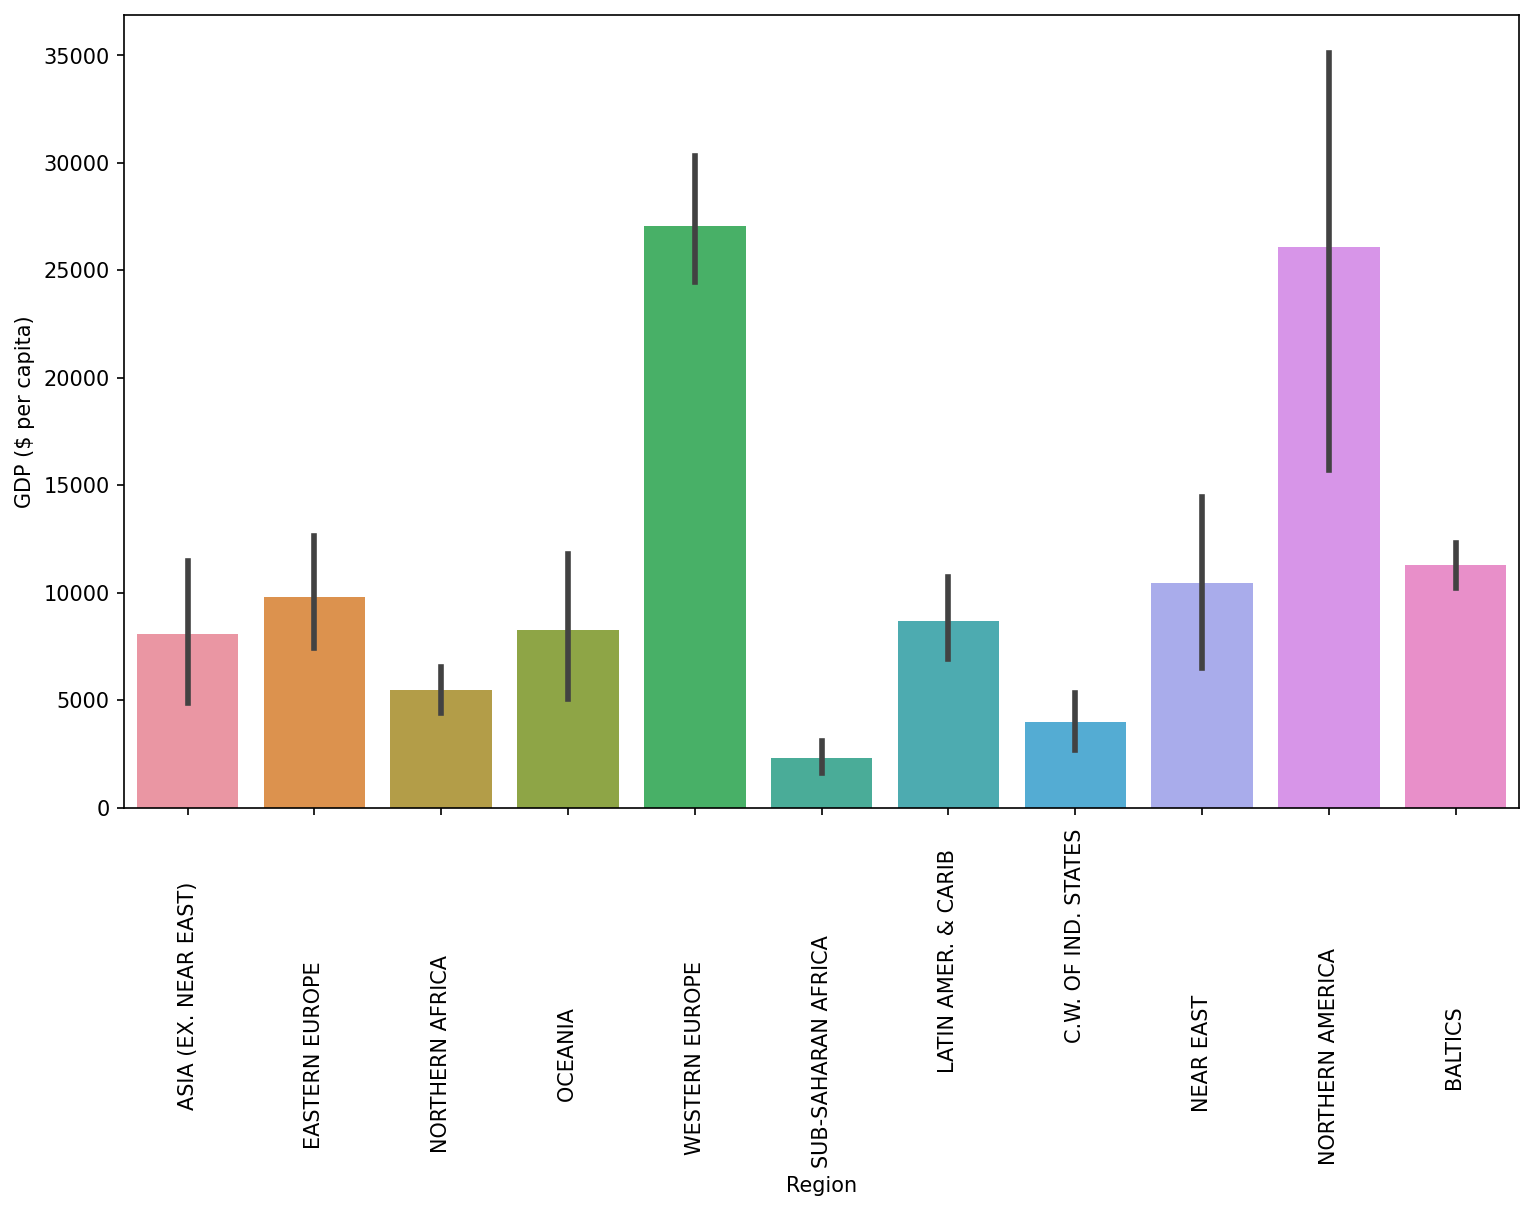

In [8]:
plt.figure(figsize=(12,7), dpi=150)
sns.barplot(y="GDP ($ per capita)", x="Region", data=df, estimator=np.mean);
plt.xticks(rotation=90);

**TASK: Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

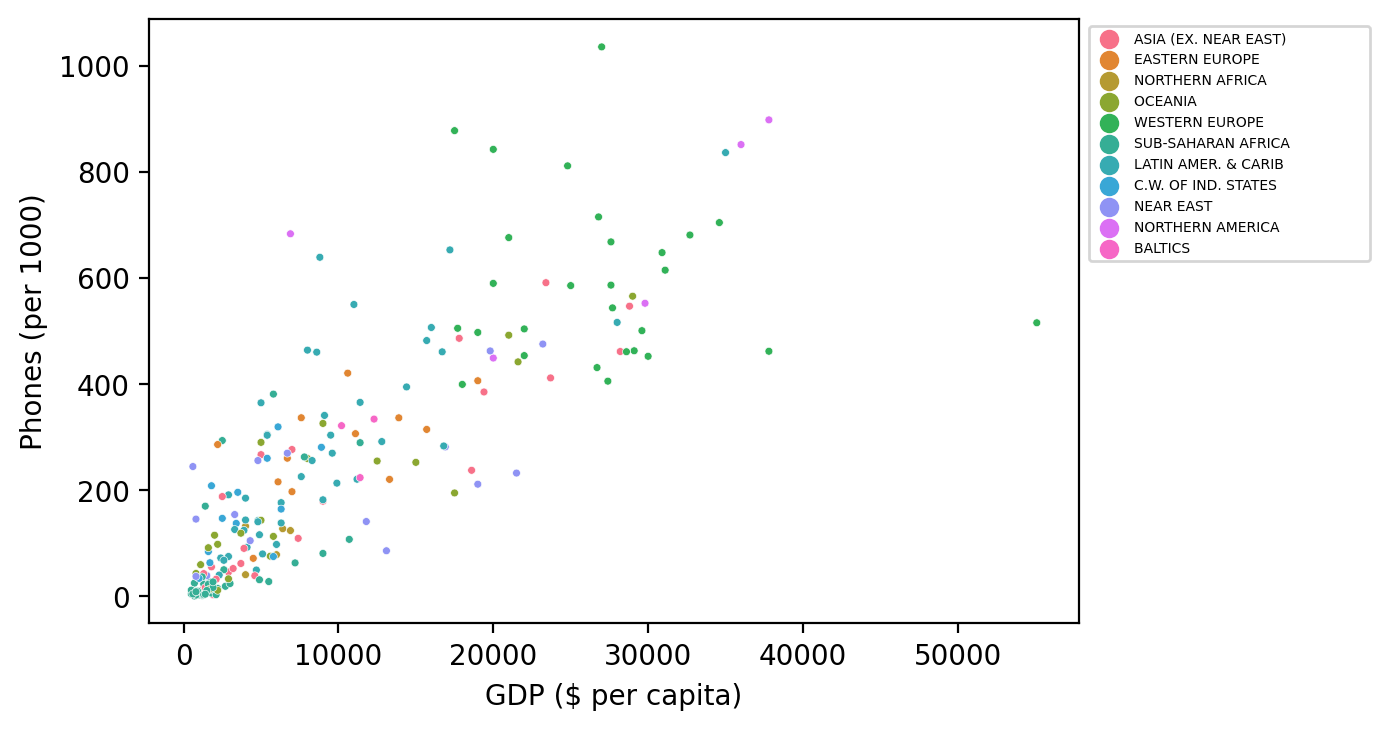

In [9]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x="GDP ($ per capita)", y="Phones (per 1000)", hue="Region", s=8);
plt.legend(bbox_to_anchor=(1.32, 1), fontsize=5)

**TASK: Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

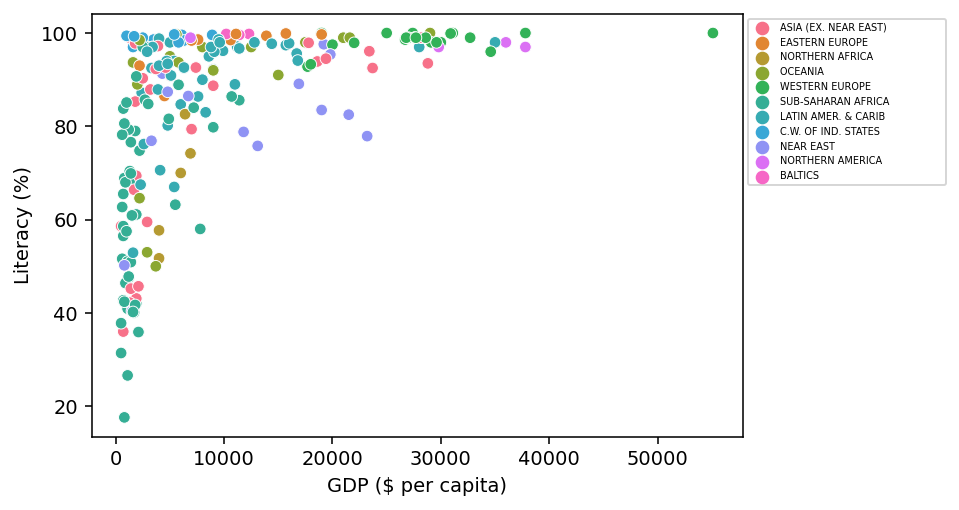

In [10]:
plt.figure(dpi=140)
sns.scatterplot(data=df, y="Literacy (%)", x="GDP ($ per capita)", hue="Region")
plt.legend(bbox_to_anchor=(1.32, 1), fontsize=5);

**TASK: Create a Heatmap of the Correlation between columns in the DataFrame.**

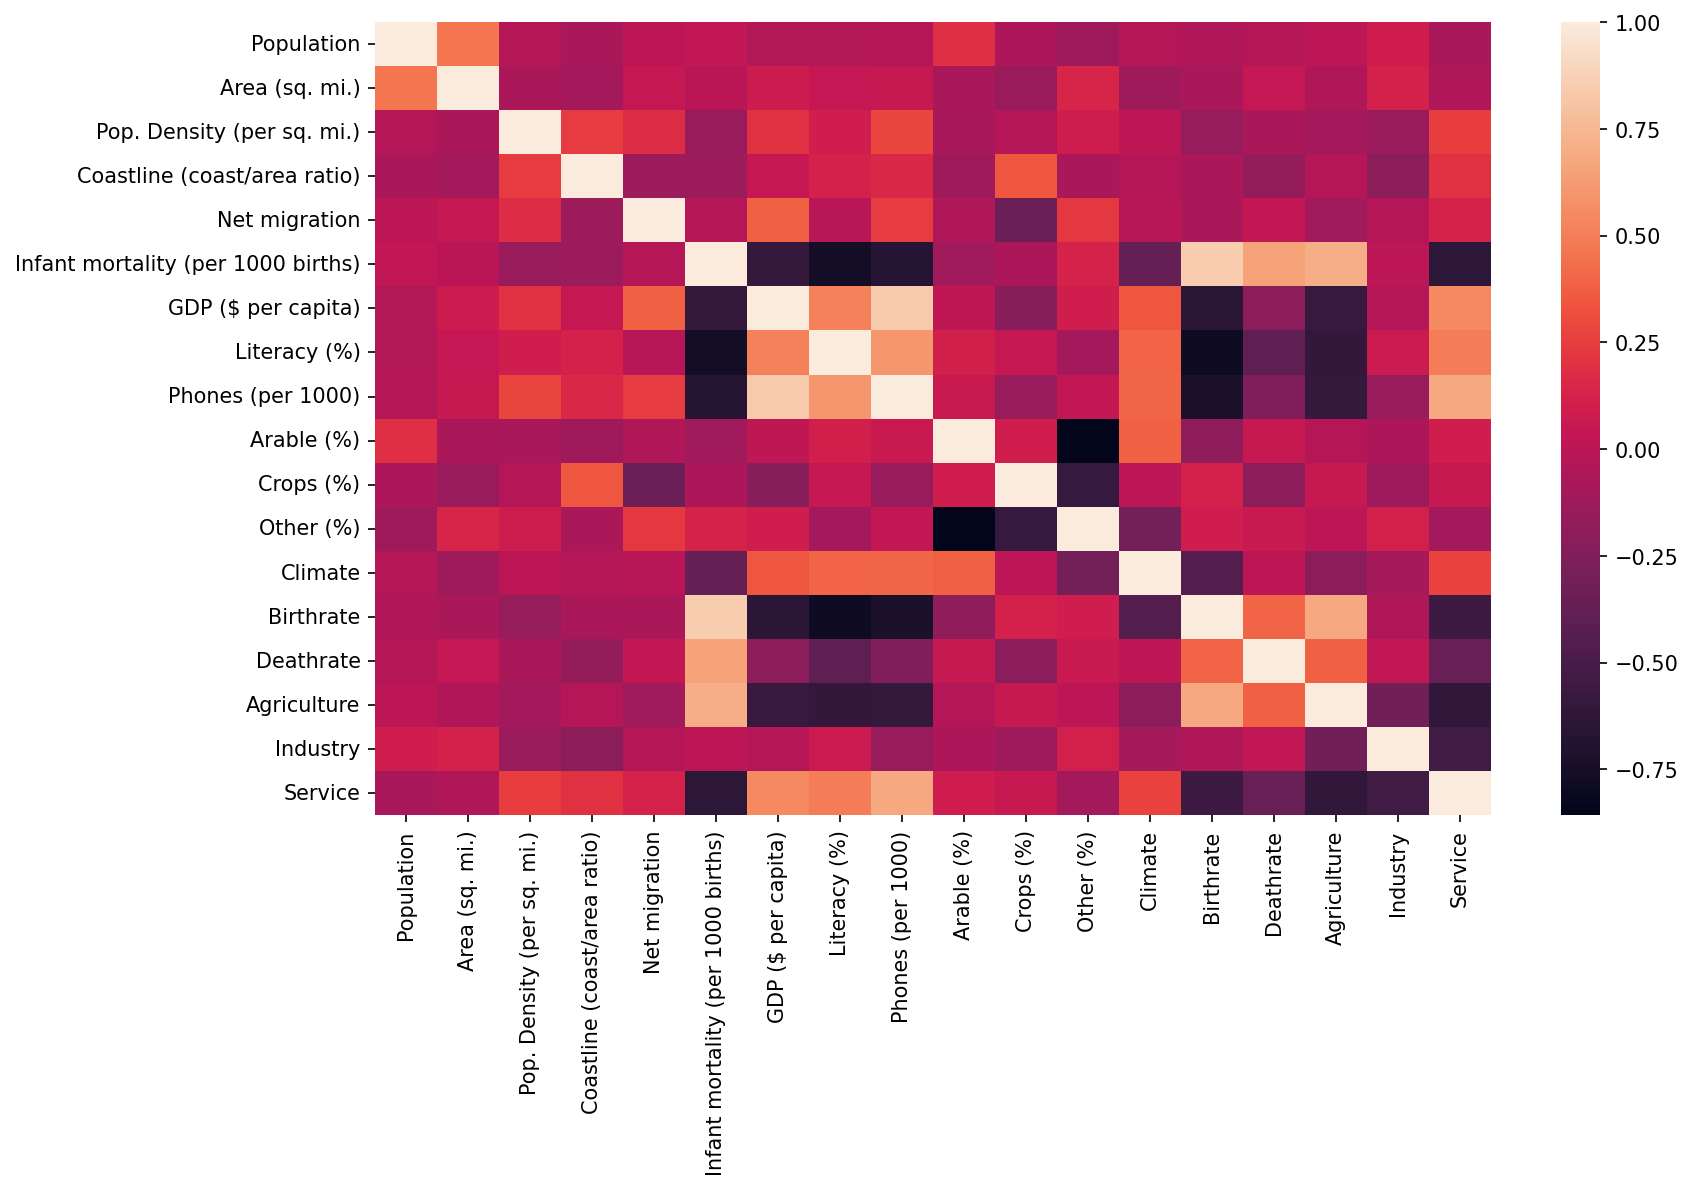

In [11]:
plt.figure(figsize=(12,7), dpi=150)
sns.heatmap(df.corr());

**TASK: Seaborn can auto perform hierarchal clustering through the clustermap() function. Create a clustermap of the correlations between each column with this function.**

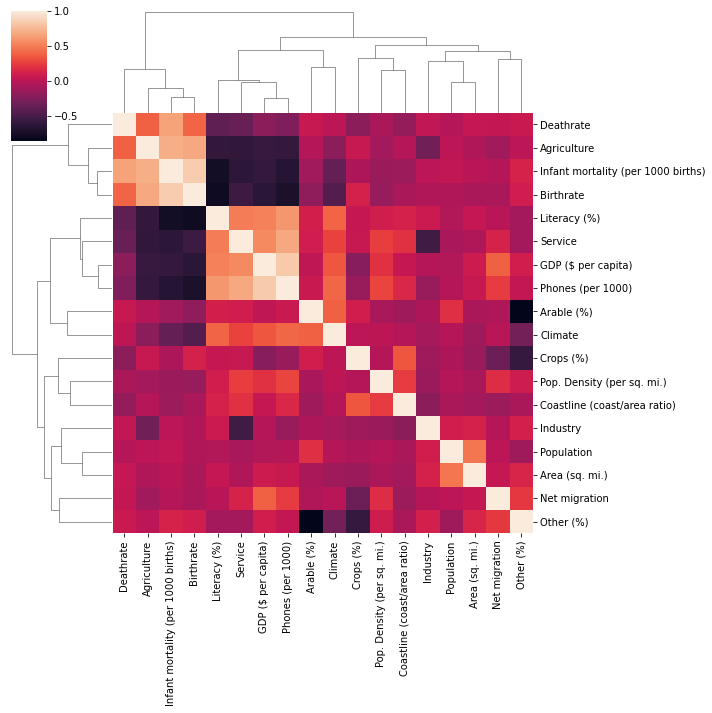

In [12]:
sns.clustermap(df.corr(), row_cluster=True);

## Data Preparation and Model Discovery

Let's now prepare our data for Kmeans Clustering!

### Missing Data

**TASK: Report the number of missing elements per column.**

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [14]:
# countries with agriculture values are nan
df["Country"][df["Agriculture"].isnull()==True]

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**TASK: You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant. There should be 15 countries in total you do this for.

In [15]:
# taking indexes of small island countries
countries_indexes = df["Country"][df["Agriculture"].isnull()==True].index
countries_indexes

Int64Index([3, 4, 78, 80, 83, 134, 140, 144, 153, 171, 174, 177, 208, 221,
            223],
           dtype='int64')

In [16]:
# filling nan values of these small island countries with 0
df.iloc[countries_indexes] = df.iloc[countries_indexes].fillna(0)

**TASK: Now check to see what is still missing by counting number of missing elements again per feature:**

In [17]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

In [18]:
# selecting climate nan countries
climate_nan_countries = df[df["Climate"].isnull()]
climate_nan_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688


In [19]:
# mean climate values per region
region_climate_means_data = df.groupby(df["Region"]).mean()
region_climate_means_data.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,1264.825000,17.926786,1.372500,41.780000,8053.571429,79.553571,171.159259,15.874643,3.848929,80.276429,1.962963,21.157857,7.637143,0.177643,0.302143,0.520107
BALTICS,2.394991e+06,5.833833e+04,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,3.000000,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,2.550000,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,9.992893e+06,9.601850e+04,100.900000,1.035000,-0.647500,12.686667,9808.333333,97.088889,280.750000,30.982500,2.430833,66.587500,3.111111,10.370909,10.284545,0.092167,0.309250,0.598667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,136.202222,15.972222,-1.494444,20.092667,8682.222222,90.654545,265.624444,10.790889,4.913556,84.295778,2.033333,19.081111,6.376000,0.086978,0.244733,0.621800


In [20]:
# filling climate nan values with mean value of its own region
for index in climate_nan_countries.index:
    for region in region_climate_means_data.index:
        if (climate_nan_countries.loc[index]["Region"]) == region:
            df.loc[index, "Climate"] = region_climate_means_data.loc[region]["Climate"]

**TASK: Check again on many elements are missing:**

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**TASK: It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [22]:
#selecting literacy nan countries
literacy_nan_countries = df[df["Literacy (%)"].isnull()]
literacy_nan_countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,2.826087,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860


In [23]:
# mean literacy values per region
region_literacy_means_data = df.groupby(df["Region"]).mean()
region_literacy_means_data.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Region,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,1264.825000,17.926786,1.372500,41.780000,8053.571429,79.553571,171.159259,15.874643,3.848929,80.276429,1.962963,21.157857,7.637143,0.177643,0.302143,0.520107
BALTICS,2.394991e+06,5.833833e+04,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,3.000000,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,2.550000,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,9.992893e+06,9.601850e+04,100.900000,1.035000,-0.647500,12.686667,9808.333333,97.088889,280.750000,30.982500,2.430833,66.587500,3.111111,10.370909,10.284545,0.092167,0.309250,0.598667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,136.202222,15.972222,-1.494444,20.092667,8682.222222,90.654545,265.624444,10.790889,4.913556,84.295778,2.033333,19.081111,6.376000,0.086978,0.244733,0.621800


In [24]:
# filling literacy nan values with mean value of its own region
for index in literacy_nan_countries.index:
    for region in region_literacy_means_data.index:
        if (literacy_nan_countries.loc[index]["Region"]) == region:
            df.loc[index, "Literacy (%)"] = region_literacy_means_data.loc[region]["Literacy (%)"]

**TASK: Check again on the remaining missing values:**

In [25]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**TASK: Optional: We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [26]:
df = df.dropna()

## Data Feature Preparation

**TASK: It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [27]:
df = df.drop("Country", axis=1)
df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000
4,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,NORTHERN AFRICA,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,0.00,99.98,1.0,0.00,0.00,0.000,0.000,0.400
224,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


**TASK: Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [28]:
X = pd.get_dummies(df)

In [29]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Scaling

**TASK: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Creating and Fitting Kmeans Model

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

In [33]:
from sklearn.cluster import KMeans

In [34]:
ssd = []
for k in range(2,30):
    k_model = KMeans(n_clusters=k)
    k_model.fit(X_scaled)
    ssd.append(k_model.inertia_)

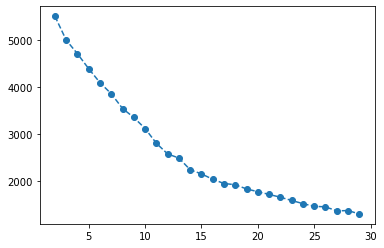

In [35]:
plt.plot(range(2,30), ssd, "o--");

In [36]:
data = pd.Series(ssd).diff()

In [38]:
data

0            NaN
1    -506.077192
2    -291.338413
3    -318.478876
4    -295.736931
5    -235.606108
6    -312.638609
7    -190.894893
8    -234.087881
9    -313.916230
10   -226.312331
11    -87.376574
12   -248.809465
13    -87.910396
14   -113.841316
15    -90.064795
16    -26.102463
17    -89.508464
18    -58.569550
19    -57.897940
20    -59.409673
21    -69.228784
22    -66.592510
23    -58.143636
24    -10.116416
25    -85.527383
26      5.657315
27    -70.627877
dtype: float64

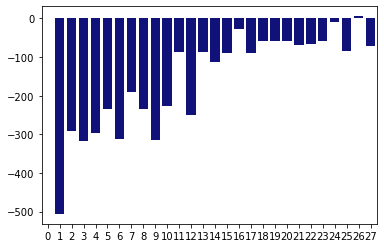

In [37]:
sns.barplot(y=data.values, x=data.index, color="darkblue");

-----

# Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here. Please feel free to jump to the solutions for a full discussion on this!.**

In [39]:
# K = 12 is such as best option based on ssd
model = KMeans(n_clusters=12)

In [40]:
model

KMeans(n_clusters=12)

In [55]:
model.fit(X_scaled)

KMeans(n_clusters=12)

In [57]:
model.labels_

array([ 2,  5,  4,  9, 10,  2,  3,  3,  3,  3,  3,  9, 10,  3,  3,  7,  1,
        3,  5, 10,  3,  2,  6,  1,  3,  5,  2,  3,  3,  1,  5,  2,  1,  2,
        1,  2,  6,  3, 10,  2,  2,  3,  8,  3,  2,  2,  2,  3,  2,  5,  3,
        5, 10,  2,  3,  3,  3,  4,  3,  2,  2,  0,  2, 10,  9, 10, 10,  3,
        9,  2,  2,  7,  3, 10,  2, 10, 10,  6,  3,  3,  9,  3,  2,  2,  3,
        3,  3, 10,  5, 10,  8,  1,  1,  7, 10, 10,  7, 10,  3,  1, 10,  7,
        3,  2,  9,  1,  1,  7,  3,  1,  0,  7,  2,  2,  4, 10,  0, 10, 10,
        5,  2,  2,  1,  1,  2, 10,  9,  3,  2,  3,  2,  3, 11,  5,  1,  3,
        4,  2,  2,  9,  1, 10,  3,  9,  9,  3,  2,  2,  9, 10,  7,  1,  9,
        3,  9,  3,  3,  1,  5, 10,  3,  7,  3,  5,  6,  2,  3,  3,  3,  6,
        3,  9, 10,  2,  7,  2,  3,  2,  1,  5,  5,  9,  2,  2, 10,  1,  2,
        3,  2, 10, 10,  7,  1,  3,  2,  1,  2,  9,  3,  4,  7,  3,  3,  9,
        2,  5,  7, 10,  6,  3,  3,  9,  3,  1,  3,  9,  7,  4,  7,  2,  2],
      dtype=int32)

In [58]:
X["Clusters"] = model.labels_

In [59]:
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Clusters
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,2
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,1,0,0,0,0,0,0,0,5
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,1,0,0,0,0,4
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,1,0,0,9
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,1,0,0,0,0,0,7
223,273008,266000,1.0,0.42,0.00,0.00,0.0,0.000000,0.0,0.02,...,0,0,0,0,1,0,0,0,0,4
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,1,0,0,0,0,0,7
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,1,0,2
